In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im=cv2.imread('elephant.jpg') #reads as bgr image
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB) 

In [3]:
oringinal_shape=im.shape
print(im.shape)

(330, 500, 3)


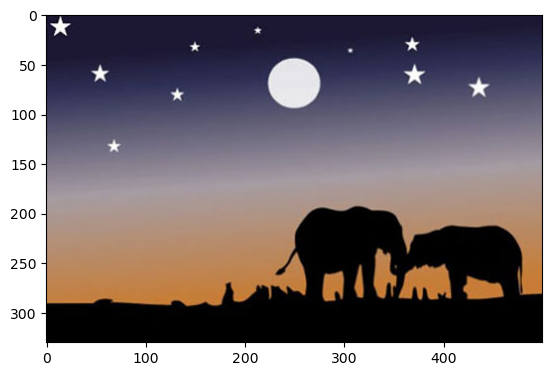

In [4]:
plt.imshow(im) #reads as rgb format
plt.show()

In [5]:
# Flatten earch channel of image
all_pixels=im.reshape((330*500,3))
print(all_pixels.shape)

(165000, 3)


In [6]:
from sklearn.cluster import KMeans

In [7]:
dominant_colors=4

km=KMeans(n_clusters=dominant_colors)

In [8]:
km.fit(all_pixels)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [9]:
km.cluster_centers_

array([[ 99.82995446,  95.86284365, 118.62118401],
       [  1.50458875,   0.84181118,   1.15963637],
       [175.1604239 , 145.43332857, 128.15363381],
       [ 38.32990127,  35.63566343,  64.85370954]])

In [10]:
centers=np.array(km.cluster_centers_,dtype='uint')

In [11]:
centers

array([[ 99,  95, 118],
       [  1,   0,   1],
       [175, 145, 128],
       [ 38,  35,  64]], dtype=uint32)

In [12]:
# plot these colours

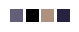

In [13]:
i=1

plt.figure(0,figsize=(8,8))
colors=[]
for each_col in centers:
    plt.subplot(1,40,i)
    i+=1
    plt.axis('off')
    colors.append(each_col)
    
#     colors swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
    
plt.show()
    

In [14]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1])

# Segment original image

In [15]:
new_img=np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


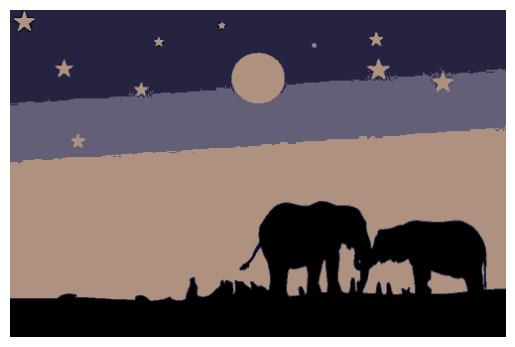

In [16]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
    
new_img=new_img.reshape((oringinal_shape))
plt.imshow(new_img)
plt.axis('off')
plt.show()